# Professions and Word Vectors

In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
%matplotlib inline

## Helper Functions

Source: "How to make a racist AI without really trying"

In [2]:
def load_embeddings(filename):
    
    labels = []
    rows = []
    with open(filename, encoding='utf-8') as infile:
        
        # Get the file
        for i, line in enumerate(infile):
            if i % 100000 == 0:
                print(i)
            items = line.rstrip().split(' ')
            if len(items) == 2:
                continue
            labels.append(items[0])
            
            values = np.array([float(x) for x in items[1:]], 'f')
            
            # Normalize the values for geometry calculations
            values = normalize(values.reshape(1, -1))
            
            rows.append(values)
        
        arr = np.vstack(rows)
        return pd.DataFrame(arr, index=labels, dtype='f')

## Data In

In [3]:
# We will use the 400K sample since the other samples will kill the machine
embeddings = load_embeddings('data/glove.6B.100d.txt')

0
100000
200000
300000


## Analysis

In [4]:
# Get our two endpoints for our hispanic-american axis
mexican_vector = np.array(embeddings[embeddings.index == 'mexican'])
american_vector = np.array(embeddings[embeddings.index == 'american'])

In [5]:
# Get the direction vector that will define our hispanic-american axis
direction = american_vector - mexican_vector

In [67]:
# Profession words to check
professions = ['businessman','manager','legislator','maid','waiter','waitress','janitor'
               ,'doorman','custodian','gardener','landscaper','stonemason'
               ,'governor','doctor','nurse','attorney','lawyer','dentist','astronaut'
               ,'plumber','barber','hairdresser','cashier','dishwasher','nanny','manicurist'
               ,'bartender','carpenter','programmer','ceo','vp','executive','accountant']

# Add 'mexican' and 'american' for later plotting
professions.append('mexican')
professions.append('american')

In [68]:
# Let's calculate the positions of each profession word on the hispanic-american axis
positions_on_axis = list()
for profession in professions:
    
    position = np.sum(np.array(embeddings[embeddings.index == profession]) * direction)/np.linalg.norm(direction)**2
    positions_on_axis.append(position)



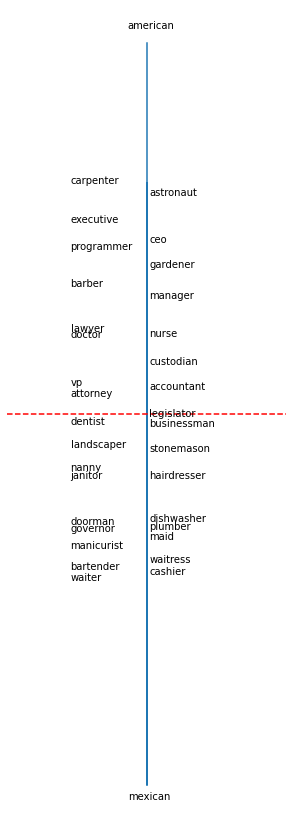

In [69]:
# Let's plot it
fig, ax = plt.subplots(figsize=(5,15))

zeros_for_1d = np.zeros_like(positions_on_axis)
ax.plot(zeros_for_1d, positions_on_axis)
ax.axhline(0, linestyle='--', color='red')

# Annotate in order
sorting_indices = np.argsort(np.array(positions_on_axis))

for i, ix in enumerate(sorting_indices):
    txt = professions[ix]
    if txt == 'mexican':
        ax.annotate(txt, (-0.0075, positions_on_axis[ix]-0.02))
    elif txt == 'american':
        ax.annotate(txt, (-0.0075, positions_on_axis[ix]+0.02))
    elif i % 2 == 0:
        ax.annotate(txt, (0.001, positions_on_axis[ix]))
    else:
        ax.annotate(txt, (-0.03, positions_on_axis[ix]))
        
_ = ax.axis('off')